<a href="https://colab.research.google.com/github/alswnsdlf/sec1_project/blob/main/ai06_sec1_project_%EB%AF%BC%EC%A4%80%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
## 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다. = 출고량에 대해서 그래프 그리기

In [ ]:
### Name : 게임의 이름입니다.
### Platform : 게임이 지원되는 플랫폼의 이름입니다.
### Year : 게임이 출시된 연도입니다.
### Genre : 게임의 장르입니다.
### Publisher : 게임을 제작한 회사입니다.
### NA_Sales : 북미지역에서의 출고량입니다.
### EU_Sales : 유럽지역에서의 출고량입니다.
### JP_Sales : 일본지역에서의 출고량입니다.
### Other_Sales : 기타지역에서의 출고량입니다.

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns

In [2]:
from google.colab import files
myfile = files.upload()

Saving gamea.xlsx to gamea.xlsx


In [3]:
df = pd.read_excel("gamea.xlsx")
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,isc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
        return 1000000.0
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [ ]:
df = df.dropna()

In [ ]:
def year(string):
    if string <= 20:
        string += 2000
        return string
    elif string >=20 and string <= 100:
        string += 1900
        return string
    else:
        return string
df['Year'] = df['Year'].apply(year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
columns = df['Genre'].dropna().unique()
columns = df['Name'].dropna().unique()

In [ ]:
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,isc,0.04,0.00,0.00,0.00
4,platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [ ]:
dfg=df['Genre']

In [ ]:
## 지역에 따라서 선호하는 게임 장르 차이

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [ ]:
dfn = df1['NA_Sales']
dfe = df1['EU_Sales']
dfj = df1['JP_Sales']
dfo = df1['Other_Sales']

In [ ]:
stats.ttest_ind(dfn, dfe)

Ttest_indResult(statistic=15.558196606164977, pvalue=2.1979379989394817e-54)

In [ ]:
stats.ttest_ind(dfn, dfj)

Ttest_indResult(statistic=27.109771552908974, pvalue=4.534686549357139e-160)

In [ ]:
stats.ttest_ind(dfn, dfo)

Ttest_indResult(statistic=32.845594175549536, pvalue=8.35747902657906e-233)

In [ ]:
stats.ttest_ind(dfe, dfj)

Ttest_indResult(statistic=14.726633336211806, pvalue=6.249307347242051e-49)

In [ ]:
stats.ttest_ind(dfe, dfo)

Ttest_indResult(statistic=23.315976981864118, pvalue=2.900522475974147e-119)

In [ ]:
stats.ttest_ind(dfj, dfo)

Ttest_indResult(statistic=10.623412136256935, pvalue=2.561231675612287e-26)

In [ ]:
## 가정 : 지역별로 선호하는 게임의 장르는 다르다.
## 이를 확인하기 위해, 지역별로 선호하는 게임의 장르는 같다는 가설을 확인해봐야한다.
##  모든 p-value(검정 통계량) 의 값이 0.05 보다 작다.
##  p-value 가 0.05 보다 작으므로 지역별로 선호하는 게임의 장르는 같지 않을 수도
## 있다, 즉, 지역별로 게임의 장르에 대한 선호도가 다를 수도 있다는 결론이 도출된다.

In [ ]:
df1.groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265630,0.158553,0.049610,0.057297
Adventure,0.084295,0.053589,0.044036,0.014334
Fighting,0.264043,0.119617,0.104246,0.043289
Puzzle,0.214806,0.089170,0.099364,0.021979
Racing,0.291815,0.193222,0.046288,0.062698
Role-Playing,0.217858,0.125177,0.234393,0.038779
Shooter,0.448812,0.242367,0.029828,0.079578
Siulation,0.214203,0.133424,0.075018,0.036978
Sports,0.290716,0.161102,0.058464,0.057549


In [ ]:
## 각 지역별 장르 평균 출고량 현황

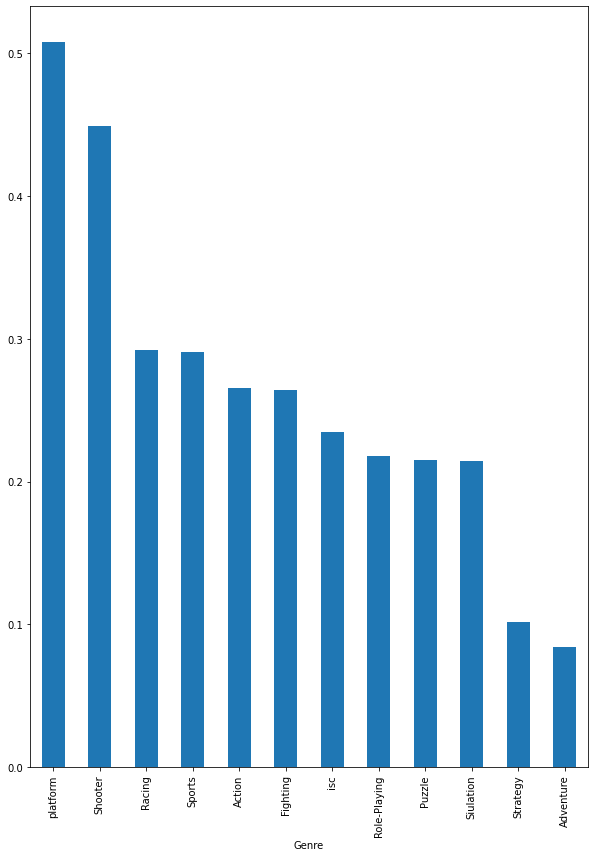

In [ ]:
df1.groupby("Genre").NA_Sales.mean().sort_values(ascending=False)[:12].plot.bar()

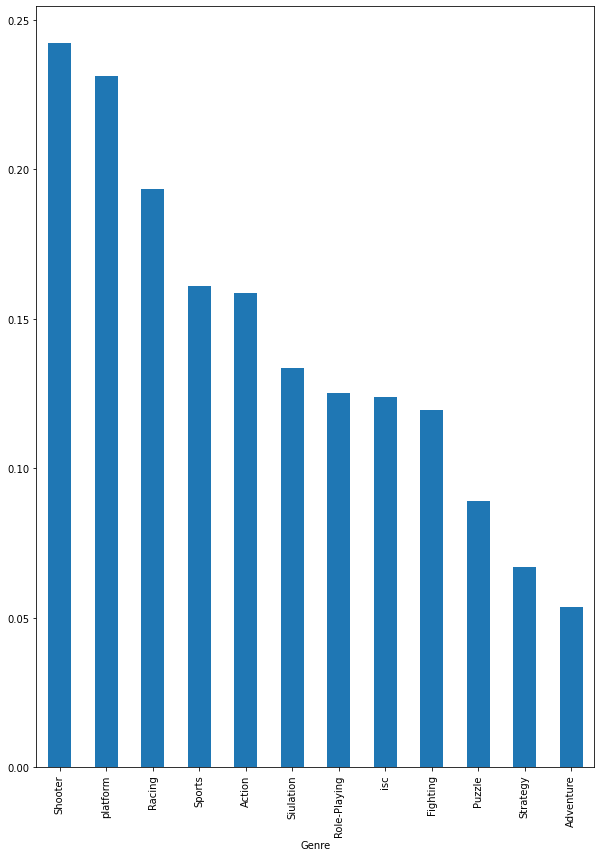

In [ ]:
df1.groupby("Genre").EU_Sales.mean().sort_values(ascending=False)[:12].plot.bar()

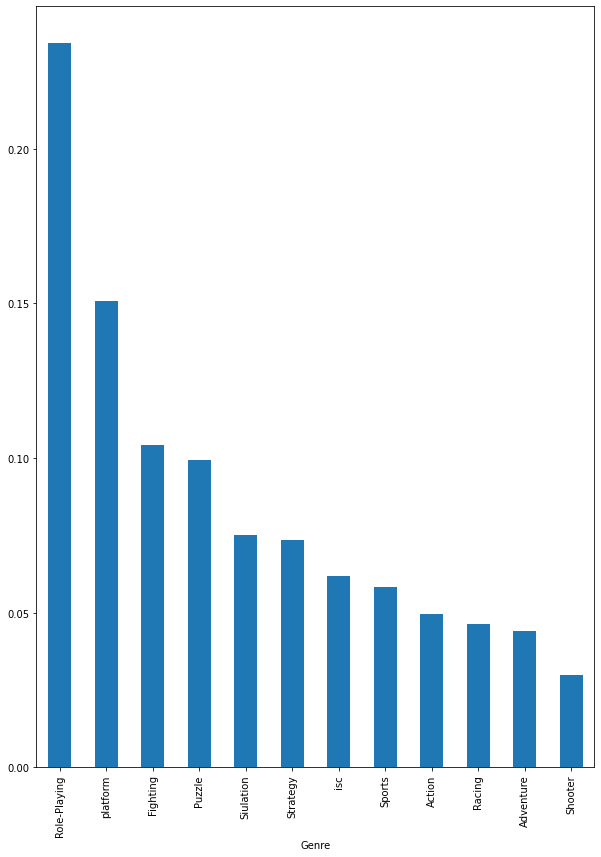

In [ ]:
df1.groupby("Genre").JP_Sales.mean().sort_values(ascending=False)[:12].plot.bar()

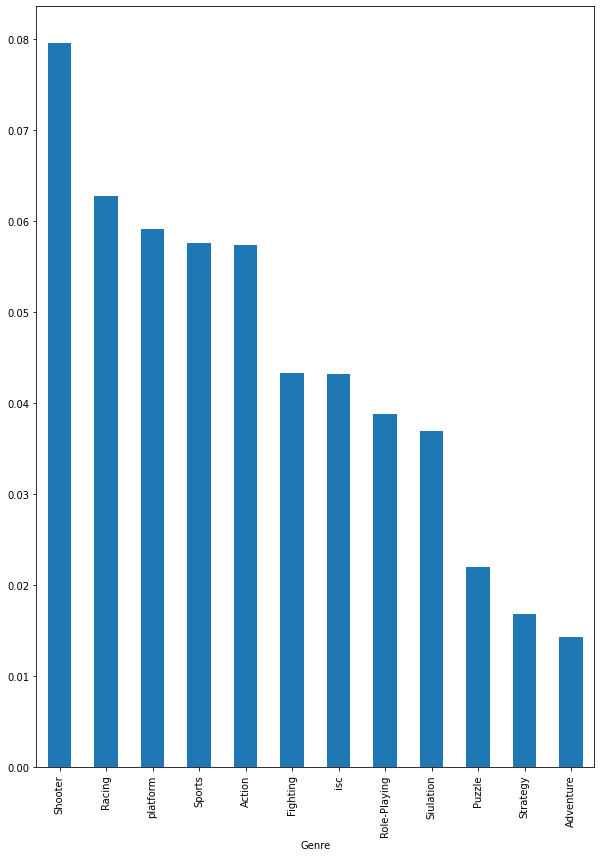

In [ ]:
df1.groupby("Genre").Other_Sales.mean().sort_values(ascending=False)[:12].plot.bar()

In [ ]:
## 카이제곱검정
## 관찰된 빈도가 기대되는 빈도와 의미있게 다른지의 여부 검정

In [ ]:
## 연도별 게임의 트랜드 구하기
## 대립가설 : 연도별로 트렌드는 있을 것이다.
## 귀무가설 : 연도별로 트렌드는 없을 것이다.

In [ ]:
dfp = pd.crosstab(df['Genre'], df['Year'])
dfp

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,8,20,31,44,39,44,67,127,145,125,193,185,212,221,272,227,240,264,148,186,254,118,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,17,14,23,20,16,21,41,12,38,42,72,83,167,142,152,108,59,61,75,54,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,22,29,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,50,29,20,23,21,14,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,25,32,42,65,64,79,45,43,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,22,36,49,49,43,71,103,109,71,77,75,85,82,83,57,64,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,33,29,41,54,48,60,71,108,103,112,103,103,95,78,70,90,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,29,23,27,23,16,20,36,78,73,88,96,69,84,83,91,81,94,48,59,47,34,32,0,0
Siulation,0,1,0,0,0,1,0,0,1,0,1,2,1,1,7,14,13,19,8,20,15,28,19,35,27,38,58,91,118,123,79,55,18,18,11,15,9,0,1
Sports,1,4,2,1,2,1,3,4,2,3,3,7,4,9,22,29,52,46,70,62,81,96,188,125,106,122,138,168,200,184,186,122,54,53,55,62,38,0,0


In [ ]:
obss = pd.crosstab(df['Genre'], df['Year'])
print(chi2_contingency(obss, correction = True))

(2754.596798473878, 0.0, 418, array([[1.79900546e+00, 9.19491682e+00, 7.19602186e+00, 3.39812143e+00,
        2.79845294e+00, 2.79845294e+00, 4.19767942e+00, 3.19823194e+00,
        2.99834244e+00, 3.39812143e+00, 3.19823194e+00, 8.19546934e+00,
        8.59524833e+00, 1.19933698e+01, 2.41866290e+01, 4.37757996e+01,
        5.25709374e+01, 5.77680643e+01, 7.57581190e+01, 6.75626496e+01,
        6.97614341e+01, 9.63467371e+01, 1.65708392e+02, 1.54914359e+02,
        1.48717785e+02, 1.87096568e+02, 2.01488612e+02, 2.39867395e+02,
        2.85442200e+02, 2.86041869e+02, 2.51061207e+02, 2.27074467e+02,
        1.30927620e+02, 1.09139665e+02, 1.15935908e+02, 1.22732151e+02,
        6.83622076e+01, 5.99668488e-01, 1.99889496e-01],
       [7.05015655e-01, 3.60341335e+00, 2.82006262e+00, 1.33169624e+00,
        1.09669102e+00, 1.09669102e+00, 1.64503653e+00, 1.25336116e+00,
        1.17502609e+00, 1.33169624e+00, 1.25336116e+00, 3.21173798e+00,
        3.36840813e+00, 4.70010436e+00, 9.4785438

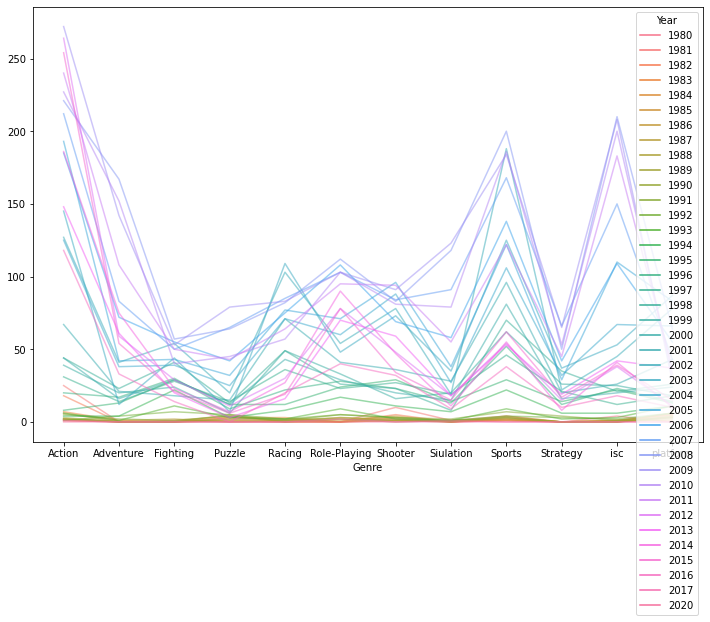

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.lineplot(data = obss,  dashes = False, alpha = 0.5);

In [ ]:
## 카이제곱 검정의 p-value 가 0 에 수렴한다.
## 따라서, 귀무가설을 기각 할 수 있으므로
## 대립 가설인 "연도별로 트렌드는 있을 것이다." 를 채택한다.

In [ ]:
df['global']=df['NA_Sales']+df['JP_Sales']+df['EU_Sales']+df['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## 모든 sales 들의 합은 세계적 출고량이다.

In [ ]:
df[['global']]

,global
0,0.04
1,0.18
2,0.02
3,0.04
4,0.25
...,...
16593,0.20
16594,0.01
16595,0.79
16596,0.38


In [ ]:
## 이름과 출고량에 대한 표를 만든다.

In [ ]:
df2 = df[['Name','global']]
df2

,Name,global
0,Candace Kane's Candy Factory,0.04
1,The Munchables,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.02
3,Deal or No Deal: Special Edition,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.25
...,...,...
16593,Ice Age 2: The Meltdown,0.20
16594,Rainbow Islands: Revolution,0.01
16595,NBA 2K16,0.79
16596,Toukiden: The Age of Demons,0.38


In [ ]:
df3 = df2.groupby('Name').mean()

In [ ]:
## 세계적으로 출고량이 많았던 TOP 10 게임들을 뽑는다.

In [ ]:
df2[['global', 'Name']].sort_values('global', ascending=False).nlargest(10, 'global')

,global,Name
2908,82.74,Wii Sports
4199,40.24,Super Mario Bros.
12579,35.83,Mario Kart Wii
3352,33.00,Wii Sports Resort
7829,31.38,Pokemon Red/Pokemon Blue
1203,30.26,Tetris
6937,30.01,New Super Mario Bros.
3014,29.01,Wii Play
16531,28.61,New Super Mario Bros. Wii
10488,28.31,Duck Hunt


In [ ]:
## 백분위로 계산

In [ ]:
Wii_Sports = 82.74/369.39
Super_Mario_Bros = 40.24/369.39
Mario_Kart_Wii = 35.83/369.39
Wii_Sports_Resort = 33/369.39
Pokemon_Red_Pokemon_Blue = 31.38/369.39
Tetris = 30.26/369.39
New_Super_Mario_Bros = 30.01/369.39
Wii_Play = 29.01/369.39
New_Super_Mario_Bros_Wii = 28.61/369.39
Duck_Hunt = 28.31/369.39

In [ ]:
82.74 + 40.24 + 35.83 + 33 + 31.38 + 30.26 + 30.01 + 29.01 + 28.61 + 28.31

369.39

In [ ]:
round(82.74/369.39 * 100, 1)

22.4

In [ ]:
round(40.24/369.39 * 100, 1)

10.9

In [ ]:
round(35.83/369.39 * 100, 1)

9.7

In [ ]:
round(33/369.39 * 100, 1)

8.9

In [ ]:
round(31.38/369.39 * 100, 1)

8.5

In [ ]:
round(30.26/369.39 * 100, 1)

8.2

In [ ]:
round(30.01/369.39 * 100, 1)

8.1

In [ ]:
round(29.01/369.39 * 100, 1)

7.9

In [ ]:
round(28.61/369.39 * 100, 1)

7.7

In [ ]:
round(28.31/369.39* 100, 1)

7.7

In [ ]:
## 결과값을 pie 차트로 나타낸다.

In [ ]:
ratio = [22.4, 10.9, 9.7, 8.9, 8.5, 8.2, 8.1, 7.9, 7.7, 7.7]
labels = ['Wii_Sports', 'Super_Mario_Bros', 'Mario_Kart_Wii', 'Wii_Sports_Resort',
          'Pokemon_Red_Pokemon_Blue', 'Tetris', 'New_Super_Mario_Bros', 'Wii_Play',
          'New_Super_Mario_Bros_Wii','Duck_Hunt']

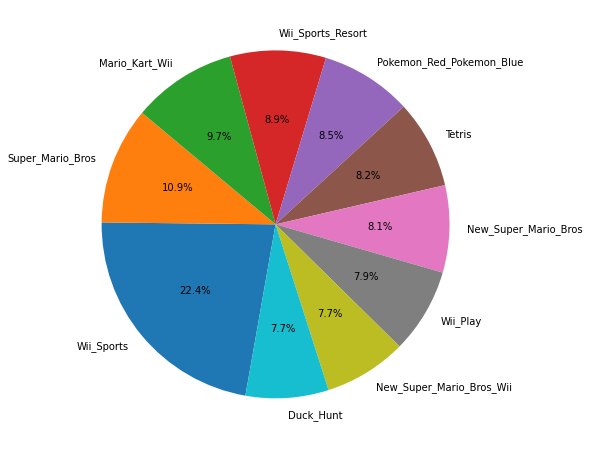

In [ ]:
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [ ]:
## Wii Sports 가 전 세계적으로 출고량이 가장 높았던 게임입니다.
## NA 는 Platform, EU는 Shooter, JP는 Role-Playing, 그 외 지역들은 Shooter 게임들이 출고량 1위를 차지했습니다.
## 이 데이터 상의 Platform 이라는 장르는 콘솔게임을 지칭한다.
## 따라서, 매출량을 증가시키려면 Shooter 장르인 콘솔 게임을 설계해야합니다.